# Blending and pasting images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
img1=cv2.imread("images\lotus.jpg")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2= cv2.imread("images\water.jpg")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

# Blending images of same size using addWeighted()

In [8]:
img1.shape

(427, 640, 3)

In [9]:
img2.shape

(183, 275, 3)

In [30]:
img1_cpy = img1
img2_cpy = img2

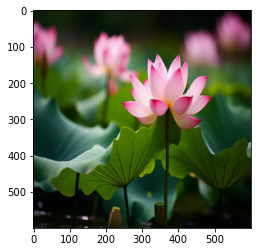

In [31]:
img1_cpy = cv2.resize(img1_cpy,(600,600))
plt.imshow(img1_cpy)

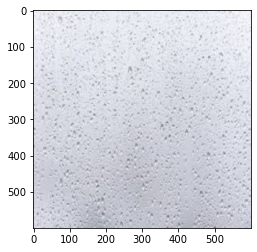

In [32]:
img2_cpy = cv2.resize(img2_cpy,(600,600))
plt.imshow(img2_cpy)

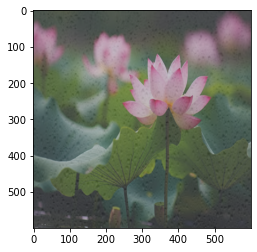

In [40]:
blended_image=cv2.addWeighted(src1=img1_cpy,alpha=0.5,src2=img2_cpy,beta=0.3,gamma=0)
plt.imshow(blended_image)


# Overlapping small image on big image

In [41]:
img1=cv2.imread("images\lotus.jpg")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2= cv2.imread("images\water.jpg")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [42]:
img1.shape

(427, 640, 3)

In [43]:
img2.shape

(183, 275, 3)

In [45]:
large_img = img1
small_img = img2

In [48]:
x_start=0
y_start=0
x_end = x_start+small_img.shape[1] #numpy reads width of image as colums
y_end = y_start+small_img.shape[0] #numpy reads height of image as rows


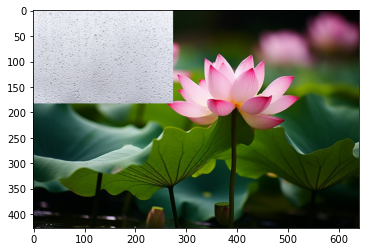

In [50]:
large_img[y_start:y_end,x_start:x_end] = small_img
plt.imshow(large_img)